# About Facebook Prophet


Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.


**2. Advantages of Prophet **


Prophet has several advantages associated with it. These are given below:-

1. Accurate and fast - Prophet is accurate and fast. It is used in many applications across Facebook for producing reliable forecasts for planning and goal setting.
2. Fully automatic - Prophet is fully automatic. We will get a reasonable forecast on messy data with no manual effort.
3. Tunable forecasts - Prophet produces adjustable forecasts. It includes many possibilities for users to tweak and adjust forecasts. We can use human-interpretable parameters to improve the forecast by adding our domain knowledge.
4. Available in R or Python - We can implement the Prophet procedure in R or Python.
5. Handles seasonal variations well - Prophet accommodates seasonality with multiple periods.
6. Robust to outliers - It is robust to outliers. It handles outliers by removing them.
7. Robust to missing data - Prophet is resilient to missing data.
3. Installation of Prophet
Table of Contents

We can install Prophet using either command prompt or Anaconda prompt using pip as follows-


In [1]:
!pip install prophet

# Getting stock data from Yahoo into FB Prophet



Let's plot historical stock prices for S& P 500. Ticker symbol is '^GSPC'

To view
[Ticker Symbls list](https://stockanalysis.com/stocks/)

[*********************100%%**********************]  1 of 1 completed


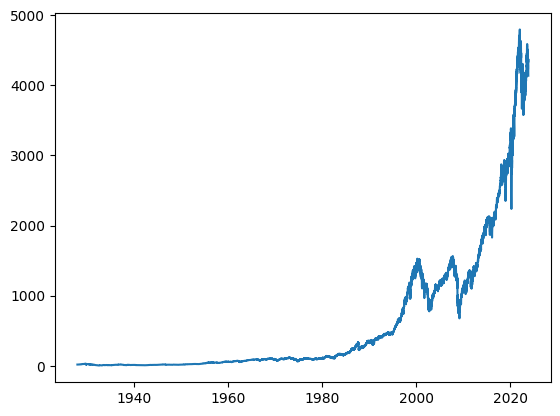

In [2]:

# Python
import pandas as pd
from prophet import Prophet

from pandas_datareader import data as web
import datetime

import pandas as pd
import matplotlib.pyplot as plt

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

from datetime import timedelta

import matplotlib.pyplot as plt

#stock = 'spy'
#yesterday = pd.to_datetime("today")-1
#print(yesterday)
#endDate = pd.to_datetime("today")
#start_date = (datetime.datetime.now() - datetime.timedelta(days=2000)).strftime("%m-%d-%Y")
#start_date = (endDate - datetime.timedelta(days=2000)).strftime("%m-%d-%Y")
#print(start_date)
#df = web.DataReader(stock, data_source='yahoo', start=start_date,end=endDate)
#df = web.DataReader(stock, data_source='yahoo', start=start_date)
#date is the index so you need to make it a column
#df["Date"] = df.index

stock='^GSPC'




start = '1900-01-01'

today = pd.to_datetime("today")
yesterday = pd.to_datetime("today") - timedelta(days = 1)
end = yesterday

df = yf.download(stock,
start=start,
end=yesterday,
auto_adjust=True,
actions='inline',
progress=True)

df = df.loc[:, ['Close']]
#df_GSPC = df_GSPC.pct_change().dropna()

plt.plot(df['Close'])
# plt.savefig('/content/gdrive/My Drive/Colab Notebooks/SPY_time_series_forecasting/images/SPY.png')


In [3]:
# Most recent stock prices
df.tail()


Close
Date                   
2023-10-20  4224.160156
2023-10-23  4217.040039
2023-10-24  4247.680176
2023-10-25  4186.770020
2023-10-26  4137.229980

In [4]:
# Most historic Stock Prices
df.head()

Close
Date                 
1927-12-30  17.660000
1928-01-03  17.760000
1928-01-04  17.719999
1928-01-05  17.549999
1928-01-06  17.660000

In [5]:
#date is the index so you need to make it a column
df["Date"] = df.index
df = df.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")


# Make Stock Predictions

In [6]:
m = Prophet()
m.fit(df)
# Python
future = m.make_future_dataframe(periods=151)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn87u_crd/8fizv4ea.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn87u_crd/zm6pbmso.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39098', 'data', 'file=/tmp/tmpn87u_crd/8fizv4ea.json', 'init=/tmp/tmpn87u_crd/zm6pbmso.json', 'output', 'file=/tmp/tmpn87u_crd/prophet_modeloiar0rkz/prophet_model-20231027220525.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:05:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:05:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper
24217 2024-03-21  3850.715377  3581.285898  4126.204341
24218 2024-03-22  3851.023996  3591.236767  4112.299698
24219 2024-03-23  3851.762869  3583.544971  4115.207321
24220 2024-03-24  3852.540063  3594.377231  4118.875773
24221 2024-03-25  3852.813933  3575.066587  4123.780102

In [7]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)
#use "all" tab. Variations in 1 week, 1 month etc is infinitesimally small


In [8]:
plot_components_plotly(m, forecast)


#Interview Readiness Questions
1. Choose a new Ticker Symbol
2. What were the future price predictions
3. What were the initial price predictions

In [9]:
stock='AAPL'




start = '1900-01-01'

today = pd.to_datetime("today")
yesterday = pd.to_datetime("today") - timedelta(days = 1)
end = yesterday

data = yf.download(stock,
start=start,
end=yesterday,
auto_adjust=True,
actions='inline',
progress=True)

data = data.loc[:, ['Close']]
#df_GSPC = df_GSPC.pct_change().dropna()

plt.plot(data['Close'])
# plt.savefig('/content/gdrive/My Drive/Colab Notebooks/SPY_time_series_forecasting/images/SPY.png')

[*********************100%%**********************]  1 of 1 completed


In [10]:
#date is the index so you need to make it a column
data["Date"] = data.index
data = data.rename(columns={"Date": "ds", "Close": "y"}, errors="raise")

In [11]:
w = Prophet()
w.fit(data)
# Python
future = m.make_future_dataframe(periods=151)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn87u_crd/bot_eu3n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpn87u_crd/otcgne7_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85564', 'data', 'file=/tmp/tmpn87u_crd/bot_eu3n.json', 'init=/tmp/tmpn87u_crd/otcgne7_.json', 'output', 'file=/tmp/tmpn87u_crd/prophet_modelhudmv3jm/prophet_model-20231027220610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:06:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:06:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


ds         yhat   yhat_lower   yhat_upper
24217 2024-03-21  3850.715377  3584.245500  4119.427115
24218 2024-03-22  3851.023996  3574.703595  4128.500911
24219 2024-03-23  3851.762869  3582.718301  4133.163207
24220 2024-03-24  3852.540063  3564.540328  4115.940825
24221 2024-03-25  3852.813933  3596.069564  4116.594944

In [12]:
# Most historic Stock Prices
data.head()

y         ds
Date                           
1980-12-12  0.099450 1980-12-12
1980-12-15  0.094261 1980-12-15
1980-12-16  0.087343 1980-12-16
1980-12-17  0.089504 1980-12-17
1980-12-18  0.092099 1980-12-18

# References
1, https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

2. https://colab.research.google.com/drive/1bb9LykqXq3FV8snTlWrPTHzB3amP9YFH?usp=sharing#scrollTo=iXzl-4Fz-hPV
